# IMEC2201 Herramientas Computacionales 
## Semana 5: Sistemas de Ecuaciones
### Clase 9: Sistemas de Ecuaciones

Universidad de los Andes — Mayo 2, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Sistemas de Ecuaciones [→](#section1)
- 1.1. Introducción
- 1.2. Sistema de Ecuaciones Lineales
- 1.3. Resolución de Sistema de Ecuaciones Lineales
    - 1.3.1. Método de Sustitución
    - 1.3.2. Método de Igualación
    - 1.3.3. Método de Reducción
    - 1.3.4. Método de Matrices
    - 1.3.5. Librería NLsolve.jl
    - 1.3.6. Librería HomotopyContinuation.jl
- 1.4. Resolución de Sistema de Ecuaciones No Lineales
    - 1.4.1. Ejemplo 1
    - 1.4.2. Ejemplo 2
___

**¡Importante!** Note que la carpeta **week5** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week5**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week5) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week5`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week5`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week5/Project.toml`
  [f213a82b] HomotopyContinuation v2.6.4
  [2774e3e8] NLsolve v4.5.1
  [91a5bcdd] Plots v1.28.0


<a id="section1"></a>
# Sección 1: Sistemas de Ecuaciones

## 1.1. Introducción

Un sistema de ecuaciones es un conjunto de ecuaciones que involucra las mismas variables.

Una solución de un sistema de ecuaciones es determinar los valores para las variables que satisface cada ecuación. Es decir, resolver un sistema de ecuaciones significa hallar todas las soluciones del sistema.

Dicho en otras palabras:

> Un sistema de ecuaciones es un conjunto finito de ecuaciones para las que buscamos las soluciones comunes.

De la Semana 4, recordemos que una **ecuación lineal** es aquella que involucra una o más variables de primer grado (es decir, a la primera potencia) y no contiene productos entre las variables. Por tanto, una **ecuación no lineal** es aquella que no cumple estas condiciones.

Por ejemplo, la siguiente es una ecuación lineal:

$$
ax + bx + c = 0
$$

Mientras que la siguiente no:

$$
ax^2 + bx + c = 0
$$

Note que la diferencia está en el primer término: $ax$ (ecuación lineal) y $ax^2$ (ecuación no lineal).

La distinción entre un sistema de ecuaciones linales y uno de ecuaciones no lineales es importante para definir el método de resolución. Típicamente se tienen tres:
- Métodos analíticos (sustitución, igualación, reducción, matrices).
- Métodos numéricos (visto en Semana 4).
- Métodos gráficos.

## 1.2. Sistema de Ecuaciones Lineales

Es un conjunto de ecuaciones lineales en donde el problema consiste en encontrar los valores desconocidos de las variables $x_1, x_2, ..., x_n$ que satisfacen las $n$ ecuaciones.

Por ejemplo, determinar los valores de $x_1$, $x_2$ y $x_3$ que cumplen:

$$
\begin{cases}
  3x_1 + 2x_2 + x_3 = 1 \\ 
  \\
  2x_1 + 2x_2 + 4x_3 = -2 \\
  \\
  -x_1 + \frac{1}{2}x_2 - x_3 = 0
\end{cases} 
$$

Resolver un sistema de ecuaciones significa encontrar los valores de las variables utilizadas en el conjunto de ecuaciones.

Según el número de soluciones, tenemos la siguiente clasificación de sistemas de ecuaciones lineales:
- **Sistema incompatible** si no hay solución.
- **Sistema compatible determinado** si hay un único conjunto de solución.
- **Sistema compatible indeterminado** si hay un conjunto infinito de soluciones.

<img src='./img/linealsols.png' width='700' height='700' />

El sistema compatible determinado también se le conoce como **independiente**, pues cada ecuación aporta nueva información. Por el contrario, el sistema compatible indeterminado también se le conoce como **dependiente**. De aquí se derivan los términos: **linealmente independiente** y **linealmente dependiente**.

## 1.3. Resolución de Sistema de Ecuaciones Lineales

Es importante tener en cuenta que para resolver un sistema de ecuaciones de 2 variables, necesitamos al menos 2 ecuaciones. De manera similar, para resolver un sistema de ecuaciones de 3 variables, necesitaremos al menos 3 ecuaciones.

Ahora bien, veamos cuatro métodos para resolver un sistema de ecuaciones lineales:
1. Método de sustitución.
2. Método de igualación.
3. Método de reducción.
4. Método de matrices.

**Nota:** Más información [aquí](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales).

### 1.3.1. Método de Sustitución

Consiste en despejar en una de las ecuaciones con cualquier incógnita, preferiblemente la que tenga menor coeficiente y a continuación sustituirla en otra ecuación por su valor. 

El paso a paso es:
1. Se despeja una incógnita en una de las ecuaciones.
2. Se sustituye la expresión de esta incógnita en la otra ecuación, obteniendo un ecuación con una sola incógnita.
3. Se resuelve la ecuación.
4. El valor obtenido se sustituye en la ecuación en la que aparecía la incógnita despejada.

Por ejemplo:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $x_2$ de la Ecuación 1:

$$
x_2 = 22 - 3x_1 \hspace{1cm} (3)
$$

**Paso 2.** Sustituimos cada ocurrencia de la incógnita $x_2$ en la Ecuación 2, para así obtener una ecuación donde la única incógnita sea $x_1$:

$$
4x_1 - 3 (22 - 3x_1) = -1 \hspace{1cm} (4)
$$

**Paso 3.** Resolvemos la Ecuación 4 para determinar $x_1$:

$$
4x_1 - 66 + 9x_1 = -1
$$

$$
13x_1 = 65
$$

$$
\boxed{x_1 = 5}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 para determinar $x_2$:

$$
3(5) + x_2 = 22
$$

$$
\boxed{x_2 = 7}
$$

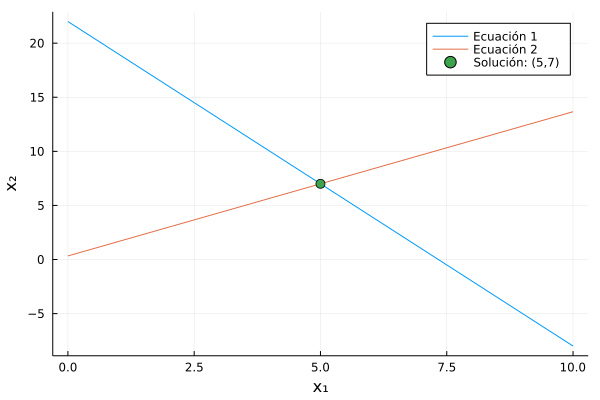

In [3]:
using Plots

x₁ = collect(0:1:10)

eq1(x₁) = 22 - 3x₁ # Ecuación 1
eq2(x₁) = (4x₁ + 1) / 3 # Ecuación 2

plot(x₁, eq1.(x₁), label="Ecuación 1")
plot!(x₁, eq2.(x₁), label="Ecuación 2")
plot!([5], [7], seriestype=:scatter, m=:circle, ms=5, label="Solución: (5,7)")

xlabel!("x₁")
ylabel!("x₂")

### 1.3.2. Método de Igualación

Consiste en despejar la misma incógnita en dos ecuaciones y a continuación se igualan entre sí la parte derecha de ambas ecuaciones.

El paso a paso es:
1. Se despeja la misma incógnita en ambas ecuaciones.
2. Se igualan las expresiones, con lo que obtenemos una ecuación con una incógnita.
3. Se resuelve la ecuación.
4. El valor obtenido se sustituye en cualquiera de las dos expresiones en las que aparecía despejada la otra incógnita.

Con el ejemplo anterior:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $x_2$ de las dos ecuaciones:

$$
\begin{cases}
  x_2 = 22 - 3x_1 & (3)\\ 
  \\
  x_2 = \frac{4x_1 + 1}{3} & (4)\\
\end{cases} 
$$

**Paso 2.** Igualamos la Ecuación 3 y Ecuación 4:

$$
22 - 3x_1 = \frac{4x_1 + 1}{3} \hspace{1cm} (5)
$$

**Paso 3.** Resolvemos la Ecuación 5 para determinar $x_1$:

$$
3 (22 - 3x_1) = 4x_1 + 1
$$

$$
13x_1 = 65
$$

$$
\boxed{x_1 = 5}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 o Ecuación 2 para determinar $x_2$:

$$
3(5) + x_2 = 22
$$

$$
\boxed{x_2 = 7}
$$

### 1.3.3. Método de Reducción

Consiste en transformar una de las ecuaciones de manera que obtengamos dos ecuaciones en la que una misma incógnita aparezca con el mismo coeficiente y distinto signo. Luego, se suman ambas ecuaciones produciéndose así la reducción o cancelación de dicha incógnita, obteniendo así una ecuación con una sola incógnita, donde el método de resolución es simple.

El paso a paso es:
1. Se preparan las dos ecuaciones, multiplicándolas por los números que convenga.
2. La restamos o sumamos de forma que desaparece una de las incógnitas.
3. Se resuelve la ecuación resultante.
4. El valor obtenido se sustituye en una de las ecuaciones iniciales y se resuelve.

Por ejemplo:

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

**Paso 1.** Multiplicamos la Ecuación 1 por -2 para, al sumar con la Ecuación 2, eliminar $x_2$:

$$
-2 (2x_1 + 3x_2 = 5) \hspace{0.5cm} \rightarrow \hspace{0.5cm} -4x_1 - 6x_2 = -10 \hspace{1cm} (3)
$$

**Paso 2 y 3.** Se suman la Ecuación 3 y Ecuación 2:

$$
(-4x_1 + 5x_1) + (-6x_2 + 6x_2) = (-10 + 4)
$$

$$
\boxed{x_1 = -6}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 o Ecuación 2 para determinar $x_2$:

$$
2(-6) + 3x_2 = 55
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

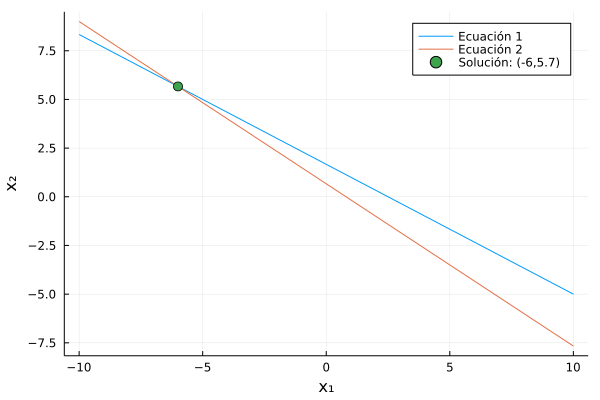

In [4]:
x₁ = collect(-10:1:10)

eq1(x₁) = (5 - 2x₁) / 3 # Ecuación 1
eq2(x₁) = (4 - 5x₁) / 6 # Ecuación 2

plot(x₁, eq1.(x₁), label="Ecuación 1")
plot!(x₁, eq2.(x₁), label="Ecuación 2")
plot!([-6], [17.0/3.0], seriestype=:scatter, m=:circle, ms=5, label="Solución: (-6,5.7)")

xlabel!("x₁")
ylabel!("x₂")

### 1.3.4. Método de Matrices

De forma genérica, tenemos $m$ ecuaciones lineales con $n$ incógnitas, donde las incógnitas son $x_1, x_2, ..., x_n$.

$$
\begin{cases}
  a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1 & (1) \\ 
  \\
  a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2 & (2) \\
  \\
  \hspace{2.5cm} \vdots \\
  \\
   a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m & (m) \\
\end{cases} 
$$

Ahora, si separamos los coeficientes $a_{nm}$, es posible reescribir el sistema de ecuaciones en forma matricial, es decir:

$$
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} =
{\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n \\
\end{bmatrix}}
$$

Representando cada matrix con una letra, se tiene:

$$
Ax = b
$$

Donde:
- $A$ es una matriz de $m$ filas por $n$ columnas y se conoce como **matriz de coeficientes**.
- $x$ es un vector columna de longitud $n$ (es decir, 1 columna y $n$ filas) y se conoce como **vector de incógnitas**.
- $b$ es un vector columna de longitud $m$ (es decir, 1 columna y $m$ filas) y se conoce como **vector de términos independientes**.

La solución es entonces:

$$
\boxed{x = A^{-1} b}
$$

El término $A^{-1}$ es la **inversa de la matrix $A$**. En Julia, la inversa de una matriz se obtiene mediante `inv(A)` o `A\`.

Recordemos que:

$$
\frac{1}{A} = A^{-1}
$$

In [5]:
#= Ejemplo 1 

3x₁ + x₂ = 22
4x₁ - 3x₂ = -1

Solución -> x₁ = 5 y x₂ = 7
=#

# Matriz de coeficientes (2 filas y 2 columnas)
A = [3  1;
     4 -3]

# Vector de términos independientes (2 filas y 1 columna)
b = [22, -1]

# Vector de incógnitas (2 filas y 1 columna)
x = inv(A) * b
x

2-element Vector{Float64}:
 5.000000000000001
 7.000000000000001

In [6]:
#= Ejemplo 2

2x₁ + 3x₂ = 5
5x₁ + 6x₂ = 4

Solución -> x₁ = -6 y x₂ = 17/3 ≈ 5.7
=#

# Matriz de coeficientes (2 filas y 2 columnas)
A = [2 3;
     5 6] # Nicolás Ruiz

# Vector de términos independientes (2 filas y 1 columna)
b = [5, 4] # Juan Sabogal

# Vector de incógnitas (2 filas y 1 columna)
x = A \ b
x

2-element Vector{Float64}:
 -6.000000000000003
  5.66666666666667

Ahora, empleando el método de las matrices, cómo resolveríamos el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
  3x_1 + 2x_2 + x_3 = 1 \\ 
  \\
  2x_1 + 2x_2 + 4x_3 = -2 \\
  \\
  -x_1 + \frac{1}{2}x_2 - x_3 = 0
\end{cases} 
$$

Recuerde que puede para definir:
- Una **matriz**, puede separar las columnas con un espacio ` ` y las filas con un punto y coma `;`.
- Un **vector**, puede separar las filas con un punto y coma `;` o una coma `,`. Esto resulta en un vector columna, es decir, de $n$ filas y 1 columna. Por otra parte, si se utiliza un espacio ` `, la separación resulta en columnas. 

Para el último caso, `[a b c]` es un vector de 1 fila y 3 columnas, mientras que `[a; b; c]` o `[a, b, c]` es un vector de 3 filas y 1 columna.

In [7]:
# Matriz de coeficientes (3 filas y 3 columnas)
A =  [ 3   2  1;
       2   2  4;
      -1 1/2 -1] # Nicolás Ruiz y Juan Sabogal

# Vector de términos independientes (2 filas y 1 columna)
b = [1, -2, 0]

# Vector de incógnitas (2 filas y 1 columna)
x = A \ b
x

3-element Vector{Float64}:
  0.6923076923076924
 -0.15384615384615394
 -0.7692307692307693

In [8]:
# Verificación
println("Ecuación 1: $(3*x[1] + 2*x[2] + x[3]) = 1")

println("Ecuación 2: $(2*x[1] + 2*x[2] + 4*x[3]) = -2")

println("Ecuación 3: $(-x[1] + (1/2)*x[2] - x[3]) = 0")

Ecuación 1: 0.9999999999999999 = 1
Ecuación 2: -2.0 = -2
Ecuación 3: -1.1102230246251565e-16 = 0


### 1.3.5. Librería `NLsolve.jl`

Veamos la sintaxis de `NLsolve.jl` con el Ejemplo 1:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases}
$$

```julia
# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir las funciones
# **Importante:** Las ecuaciones deben estar igualadas a cero
function f!(F, x) # Importante poner un "!" al final del nombre de la función 
    F[1] = 3*x[1] + x[2] - 22
    F[2] = 4*x[1] - 3*x[2] + 1
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [a, a]) # Sintaxis: 1. Función, 2. [Puntos Iniciales Según Número Incógnitas)]

# Paso 4. Llamar la solución directamente
solucion.zero
```

Fíjense que el parámetro de punto inicial está entre corchetes `[]`, es decir, es un Array. ¿Por qué? Note que en la función `f!`, la variable la llamamos como entradas del Array (es decir, `x[1]` y `x[2]`).

**Nota:** Más información de la librería `NLsolve.jl` [aquí](https://github.com/JuliaNLSolvers/NLsolve.jl) y [aquí](https://morioh.com/p/367a415c21db).

In [9]:
#= Ejemplo 1 

3x₁ + x₂ = 22
4x₁ - 3x₂ = -1

Solución -> x₁ = 5 y x₂ = 7
=#

# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir las funciones
function f!(F, x) 
    F[1] = 3*x[1] + x[2] - 22
    F[2] = 4*x[1] - 3*x[2] + 1
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

2-element Vector{Float64}:
 5.000000000008696
 7.00000000001306

In [10]:
#= Ejemplo 2

2x₁ + 3x₂ = 5
5x₁ + 6x₂ = 4

Solución -> x₁ = -6 y x₂ = 17/3 ≈ 5.7
=#

# Paso 2. Definir las funciones
function f!(F, x) 
    F[1] = 2*x[1] + 3*x[2] - 5
    F[2] = 5*x[1] + 6*x[2] - 4
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

2-element Vector{Float64}:
 -6.0000000000362
  5.666666666746343

Ahora, empleando la librería `NLsolve.jl`, cómo resolveríamos el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
  3x_1 + 2x_2 + x_3 = 1 \\ 
  \\
  2x_1 + 2x_2 + 4x_3 = -2 \\
  \\
  -x_1 + \frac{1}{2}x_2 - x_3 = 0
\end{cases} 
$$

Los resultados con el método de la matriz es $x_1 = 0.69$, $x_2 = -0.15$ y $x_3 = -0.76$.

In [11]:
# Paso 2. Definir las funciones
function f!(F, x) 
    F[1] = 3*x[1] + 2*x[2] + x[3] - 1 # Sebastián Cáceres
    F[2] = 2*x[1] + 2*x[2] + 4*x[3] + 2 # Sebastián Cáceres
    F[3] = -x[1] + (1/2)*x[2] - x[3]
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

3-element Vector{Float64}:
  0.6923076923088091
 -0.15384615384558403
 -0.7692307692318414

### 1.3.6. Librería `HomotopyContinuation.jl`

**Nota:** Más información de la librería [aquí](https://www.juliahomotopycontinuation.org/guides/solve-first-system/), [aquí](https://www.juliahomotopycontinuation.org/guides/introduction/) y [aquí](https://www.juliahomotopycontinuation.org/HomotopyContinuation.jl/stable/solve/).

In [12]:
# Paso 1. Importar librería
using HomotopyContinuation

# Paso 2. Declarar las variables incógnitas
@var x₁ x₂ x₃

# Paso 3. Definir las funciones
f₁ = 3*x₁ + 2*x₂ + x₃ - 1
f₂ = 2*x₁ + 2*x₂ + 4*x₃ + 2
f₃ = -x₁ + (1/2)*x₂ - x₃

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂, f₃])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

1-element Vector{Vector{Float64}}:
 [0.6923076923076923, -0.15384615384615377, -0.7692307692307693]

## 1.4. Resolución de Sistema de Ecuaciones No Lineales

Las soluciones de sistemas de ecuaciones no lineales emplean métodos numéricos, similar a como lo estudiamos en la Semana 4.

Notemos que el método de sustitución también es aplicable cuando las ecuaciones son no lineales, sin embargo, su desarrollo manual es más laborioso y propenso a errores.

### 1.4.1. Ejemplo 1

Emplearemos las librerías `NLsolve.jl` y `HomotopyContinuation.jl` para resolver el siguiente sistema de ecuaciones no lineales:

$$
\begin{cases}
  x_2 = x_1^2 + 6x_1 - 8 & (1) \\ 
  \\
  x_2 = 4x_1 + 7 & (2)
\end{cases} 
$$

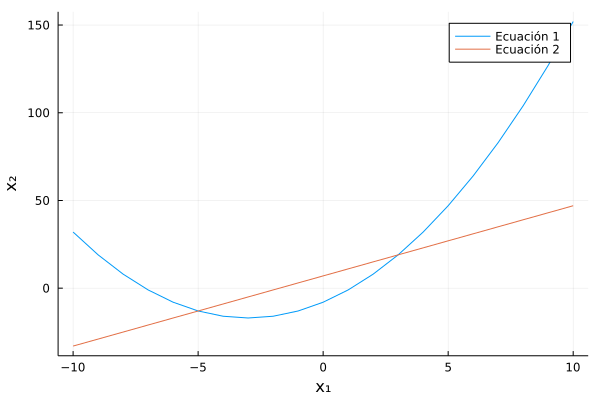

In [13]:
# Inspección gráfica
x₁ = collect(-10:1:10)

eq1(x₁) = x₁^2 + 6x₁ - 8 # Ecuación 1
eq2(x₁) = 4x₁ + 7 # Ecuación 2

plot(x₁, eq1.(x₁), label="Ecuación 1")
plot!(x₁, eq2.(x₁), label="Ecuación 2")

xlabel!("x₁")
ylabel!("x₂")

In [14]:
# NLsolve.jl

# Paso 2. Definir las funciones
function f!(F, x) 
    F[1] = x[1]^2 + 6*x[1] - 8 - x[2]
    F[2] = 4*x[1] + 7 - x[2]
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

2-element Vector{Float64}:
  3.0000000000002007
 19.000000000000803

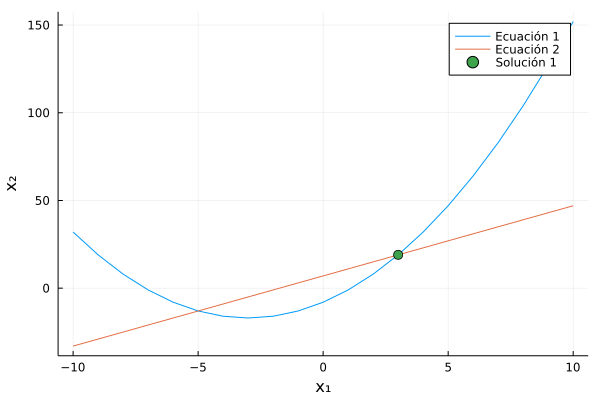

In [15]:
plot!([solucion.zero[1]], [solucion.zero[2]], seriestype=:scatter, m=:circle, ms=5, label="Solución 1")

¿Y la otra solución?

In [16]:
# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [-5.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

2-element Vector{Float64}:
  -5.0
 -12.9999999996938

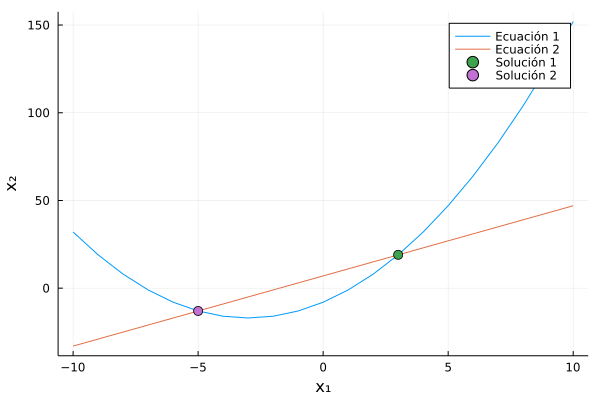

In [17]:
plot!([solucion.zero[1]], [solucion.zero[2]], seriestype=:scatter, m=:circle, ms=5, label="Solución 2")

In [18]:
# HomotopyContinuation.jl

# Paso 2. Declarar las variables incógnitas
@var x₁ x₂

# Paso 3. Definir las funciones
f₁ = x₁^2 + 6*x₁ - 8 - x₂
f₂ = 4*x₁ + 7 - x₂

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

2-element Vector{Vector{Float64}}:
 [3.0, 19.0]
 [-5.0, -13.0]

### 1.4.2. Ejemplo 2

Emplearemos la librería `HomotopyContinuation.jl` para resolver el siguiente sistema de ecuaciones no lineales:

$$
\begin{cases}
  x_1^2 + x_2^2 = 36 & (1) \\ 
  \\
  x_1 + x_2 = 7 & (2)
\end{cases} 
$$

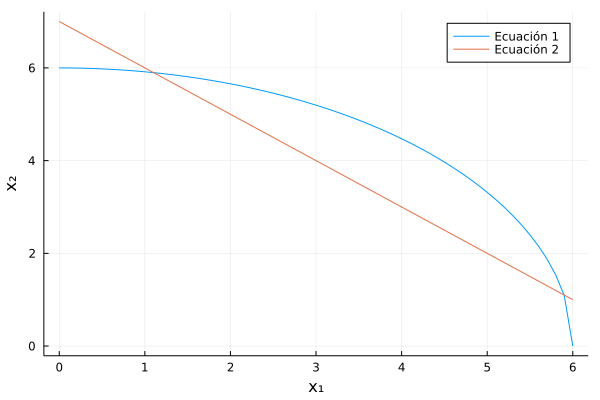

In [19]:
# Inspección gráfica
x₁ = collect(0:0.1:6)

eq1(x₁) = sqrt(36 - x₁^2) # Ecuación 1
eq2(x₁) = 7 - x₁ # Ecuación 2

plot(x₁, eq1.(x₁), label="Ecuación 1")
plot!(x₁, eq2.(x₁), label="Ecuación 2")

xlabel!("x₁")
ylabel!("x₂")

In [20]:
# HomotopyContinuation.jl

# Paso 2. Declarar las variables incógnitas
@var x₁ x₂

# Paso 3. Definir las funciones
f₁ = x₁^2 + x₂^2 - 36 
f₂ = x₁ + x₂ - 7

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

2-element Vector{Vector{Float64}}:
 [1.1020842383436396, 5.8979157616563604]
 [5.89791576165636, 1.1020842383436402]

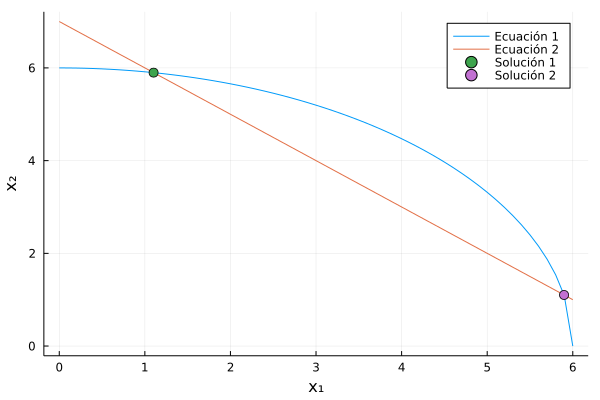

In [21]:
plot!([real_solutions(result)[1][1]], [real_solutions(result)[1][2]], seriestype=:scatter, m=:circle, ms=5, label="Solución 1")
plot!([real_solutions(result)[2][1]], [real_solutions(result)[2][2]], seriestype=:scatter, m=:circle, ms=5, label="Solución 2")